In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v1_student_depression.csv')


In [13]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656861,2.943837,0.000681,2.397405,7.156984,3.139852,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.467369,1.361148,0.044394,1.127969,3.707642,1.437270,0.492645
min,2.000000,18.000000,0.000000,0.000000,2.345000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,1.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,2.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,3.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,12.000000,5.000000,1.000000


In [14]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


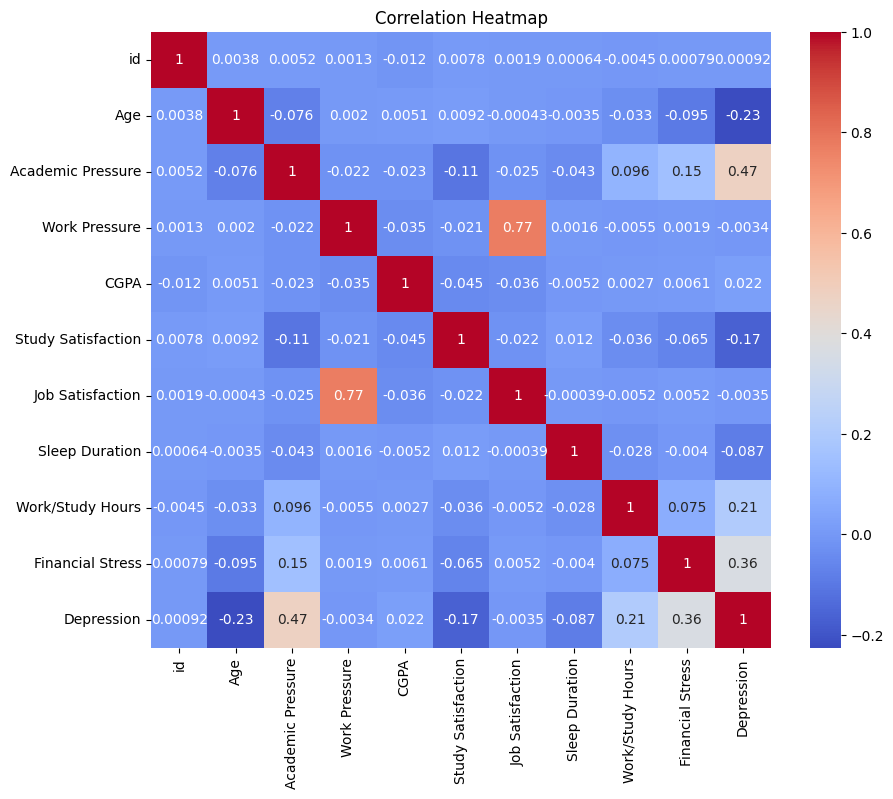

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

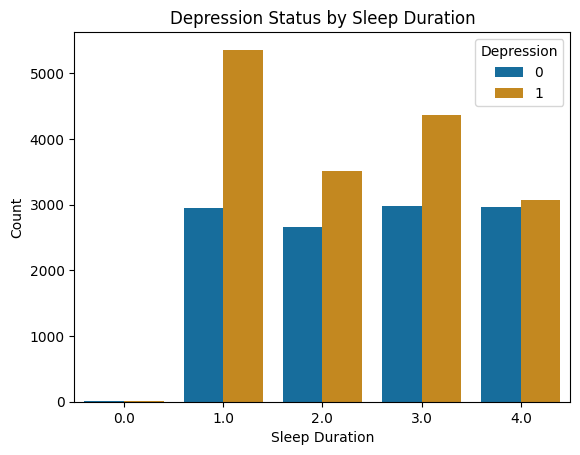

In [16]:
# Count plot for Depression by Sleep Duration
sns.countplot(x='Sleep Duration', hue='Depression', data=data, palette='colorblind')
plt.title('Depression Status by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

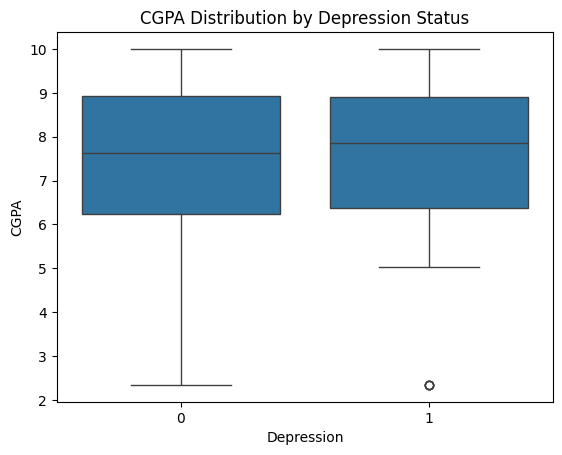

In [17]:
sns.boxplot(x='Depression', y='CGPA', data=data)
plt.title("CGPA Distribution by Depression Status")
plt.show()


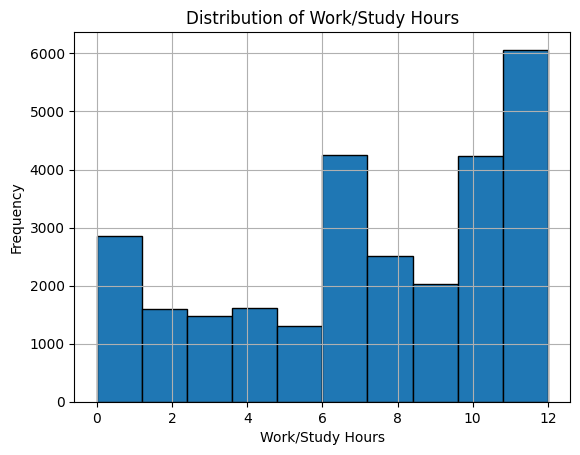

In [18]:
data['Work/Study Hours'].hist(bins=10, edgecolor='black')
plt.title("Distribution of Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Frequency")
plt.show()


In [19]:
# Statistical testing for categorical variables (e.g., Sleep Duration and Depression)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Sleep Duration'], data['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: p-value = {p}")

Chi-Square Test: p-value = 1.065310789284643e-58


In [20]:
data.to_csv('../data/processed_v2_eda_student_depression.csv', index=False)
